# Get A Selection Of Halos

info: https://cdcvs.fnal.gov/redmine/projects/des-clusters/wiki/ClustDataVecY3 <br>
path: /data/des81.b/data/mariaeli/y3_buzz/Buzzard-3_v2.0_Y3a_mastercat/

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.table import Table, vstack

## Load

In [2]:
import h5py

path   = '/data/des81.b/data/mariaeli/y3_buzz/Buzzard-3_v2.0_Y3a_mastercat/'
fname  = path+'Buzzard_v2.0_Y3a_gold.h5'
fname_aux  = path+'Buzzard-3_v2.0_Y3a_mastercat.h5'

master = h5py.File(fname)
indexes= h5py.File(fname_aux)

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
ls /data/des81.b/data/mariaeli/y3_buzz/Buzzard-3_v2.0_Y3a_mastercat/

buzzard_1.9.9_3y3a_rsshift_run.h5  Buzzard_v2.0_Y3a_gold.h5
Buzzard-3_v2.0_Y3a_mastercat.h5    Buzzard_v2.0_Y3a_shape.h5
Buzzard_v2.0_Y3a_bpz.h5            nohup.out


In [4]:
def show_h5_group(name,node):
    ''' show all the h5 groups
    Example:
    fmaster = h5py.File(copa.master_fname,'r')
    fmaster.visititems(show_h5_group)

    ## https://stackoverflow.com/questions/45562169/traverse-hdf5-file-tree-and-continue-after-return
    '''
    if isinstance(node, h5py.Group):
        print(name,node)
    return None

def show_h5_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(name,node)
    return None

In [5]:
master.visititems(show_h5_group)

(u'catalog', <HDF5 group "/catalog" (1 members)>)
(u'catalog/gold', <HDF5 group "/catalog/gold" (46 members)>)
(u'masks', <HDF5 group "/masks" (1 members)>)
(u'masks/gold', <HDF5 group "/masks/gold" (1 members)>)


In [6]:
master.visititems(show_h5_dataset)

(u'catalog/gold/coadd_object_id', <HDF5 dataset "coadd_object_id": shape (1504210222,), type ">i8">)
(u'catalog/gold/dec', <HDF5 dataset "dec": shape (1504210222,), type ">f4">)
(u'catalog/gold/flags_gold', <HDF5 dataset "flags_gold": shape (1504210222,), type ">i8">)
(u'catalog/gold/flux_g', <HDF5 dataset "flux_g": shape (1504210222,), type ">f4">)
(u'catalog/gold/flux_i', <HDF5 dataset "flux_i": shape (1504210222,), type ">f4">)
(u'catalog/gold/flux_r', <HDF5 dataset "flux_r": shape (1504210222,), type ">f4">)
(u'catalog/gold/flux_z', <HDF5 dataset "flux_z": shape (1504210222,), type ">f4">)
(u'catalog/gold/haloid', <HDF5 dataset "haloid": shape (1504210222,), type ">i8">)
(u'catalog/gold/hpix_16384', <HDF5 dataset "hpix_16384": shape (1504210222,), type ">i8">)
(u'catalog/gold/ivar_g', <HDF5 dataset "ivar_g": shape (1504210222,), type ">f4">)
(u'catalog/gold/ivar_i', <HDF5 dataset "ivar_i": shape (1504210222,), type ">f4">)
(u'catalog/gold/ivar_r', <HDF5 dataset "ivar_r": shape (150

In [7]:
#master['masks/gold'].visititems(show_h5_dataset)

In [8]:
indexes.visititems(show_h5_dataset)

(u'index/bpz/match_gold', <HDF5 dataset "match_gold": shape (1504210222,), type "<i8">)
(u'index/bpz/select', <HDF5 dataset "select": shape (1504210222,), type "<i8">)
(u'index/coadd_object_id', <HDF5 dataset "coadd_object_id": shape (1504210222,), type "<i8">)
(u'index/gold/select', <HDF5 dataset "select": shape (1504210222,), type "<i8">)
(u'index/maglim/select', <HDF5 dataset "select": shape (2388988,), type "<i8">)
(u'index/mask/fracgood', <HDF5 dataset "fracgood": shape (21590657,), type "<i8">)
(u'index/mask/hpix', <HDF5 dataset "hpix": shape (21590657,), type "<i8">)
(u'index/mask/zmax', <HDF5 dataset "zmax": shape (21590657,), type "<i8">)
(u'index/metacal/match_gold', <HDF5 dataset "match_gold": shape (1504210222,), type "<i8">)
(u'index/redmagic/combined_sample_fid/match_gold', <HDF5 dataset "match_gold": shape (3041935,), type "<i8">)
(u'index/redmagic/combined_sample_fid/random_10xdownsample_select', <HDF5 dataset "random_10xdownsample_select": shape (30419350,), type "<i8"

### Select Centrals

In [9]:
maglim_idx = indexes['index/maglim/select'][:]

hid   = master['catalog/gold/haloid'][:][maglim_idx]
rhalo = master['catalog/gold/rhalo'][:][maglim_idx]
m200  = master['catalog/gold/m200'][:][maglim_idx]
ra    = master['catalog/gold/ra'][:][maglim_idx]
dec   = master['catalog/gold/dec'][:][maglim_idx]
r200  = master['catalog/gold/r200'][:][maglim_idx]
cid   = master['catalog/gold/coadd_object_id'][:][maglim_idx]
mag_i = master['catalog/gold/mag_i'][:][maglim_idx]

centrals, = np.where(rhalo==0)

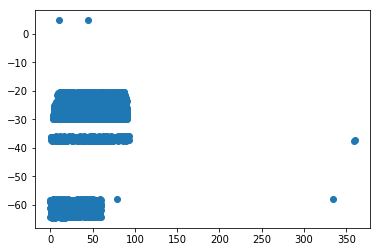

In [10]:
plt.scatter(ra[::500],dec[::500])

In [11]:
hidu, idx, counts = np.unique(hid[centrals],return_index=True,return_counts=True)

In [12]:
nrepeated = centrals.size-hidu.size
nhalos    = counts.size

print('Number of halos %.3e'%nhalos)
print('percentage of repeated halos: %.2f'%(1.*nrepeated/nhalos))

Number of halos 3.906e+05
percentage of repeated halos: 0.84


In [13]:
select = centrals[idx]

In [14]:
## eu preciso ra, dec, z, m200, r200
cat = Table([hid[select],cid[select],ra[select],dec[select],m200[select],r200[select],mag_i[select]],
            names=['haloid','coadd_object_id','RA','DEC','M200','R200','MAG_I'])

In [15]:
## check the haloid uniqueness
np.unique(cat['haloid']).size-len(cat)

0

## Get the redshift

In [16]:
fname  = path+'Buzzard_v2.0_Y3a_bpz.h5'
bpz    = h5py.File(fname)

In [17]:
bpz['catalog/bpz'].keys()

[u'coadd_object_id', u'redshift_cos', u'z', u'zmc_sof', u'zmean_sof']

In [18]:
bcid = bpz['catalog/bpz/coadd_object_id'][:][maglim_idx[select]]
cid  = cat['coadd_object_id'][:]

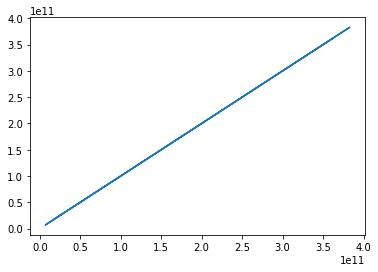

In [19]:
plt.plot(bcid,cid)

In [20]:
z = bpz['catalog/bpz/z'][:][maglim_idx[select]]

In [21]:
cat['redshift'] = z

(array([1.78080e+04, 6.77240e+04, 1.04821e+05, 1.27138e+05, 5.56690e+04,
        1.26160e+04, 4.24100e+03, 5.04000e+02, 4.30000e+01, 1.20000e+01]),
 array([0.11311644, 0.30588618, 0.49865592, 0.69142566, 0.88419541,
        1.07696515, 1.26973489, 1.46250463, 1.65527437, 1.84804411,
        2.04081386]),
 <a list of 10 Patch objects>)

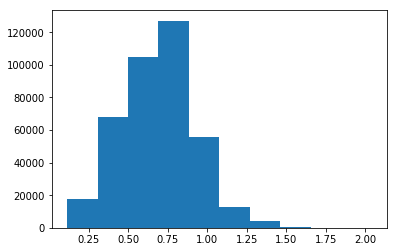

In [22]:
plt.hist(z)

### Sky Map Cut

In [23]:
def sky_plot(RA,DEC,ax=None,title=''):
    if ax is None:
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111, projection="aitoff")

    ############################
    #Codigo para plotar coordenadas de objetos na esfera celeste
    #############################
    import astropy.coordinates as coord
    from astropy import units as u
    
    ra = coord.Angle(RA*u.degree)
    #ra = ra.wrap_at(180*u.degree)
    dec = coord.Angle(DEC*u.degree)

    ##############
    #Plotando os objetos
    #import astropy.coordinates as coord
    ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
    ax.grid(True)
    ax.scatter(ra.radian, dec.radian, s=10, alpha=0.5)
    ax.set_title(title,fontsize=20)
    
    plt.subplots_adjust(top=0.9,bottom=0.0)
    # ax.set_xticklabels(['10h','8h','6h','4h','2h','0h','20h','18h','16h','14h','12h'])
    
    #fig.savefig(savefig, bbox_inches = "tight")
    #plt.clf()
    #plt.close()

In [24]:
dec_min,dec_max = -45, 0

cut = (cat['DEC']>=dec_min)&(cat['DEC']<=dec_max)

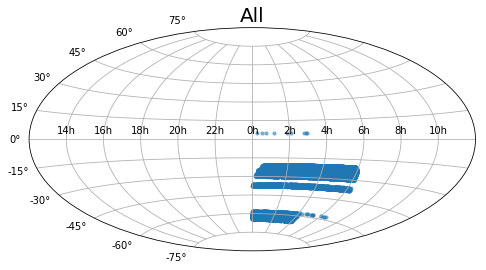

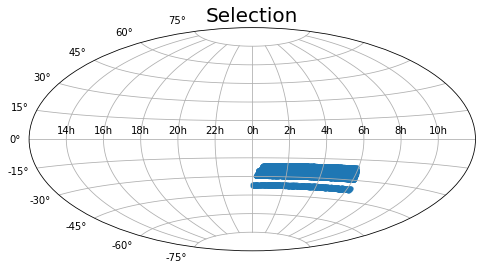

In [25]:
sky_plot(cat['RA'][::10],cat['DEC'][::10],title='All')
sky_plot(cat['RA'][cut][::10],cat['DEC'][cut][::10],title='Selection')

### Select an uniform distribution on mass and redshift

In [26]:
import sys
sys.path.append('/home/s1/jesteves/git/buzzardAnalysis/buzzardSelection/scripts/')

from helper import get_high_mass_selection,plot_scatter_hist,getMagLimModel

In [27]:
mag_file = '../scripts/files/annis_mags_04_Lcut.txt'

In [28]:
h = 0.7
Nhalos = 3000
zmax   = 0.7

In [29]:
cat_golden = get_high_mass_selection(cat[cut],zmin=0.1,zmax=zmax,Nsize=Nhalos,nbins=20,h=h)

('bin size:', 20)
('bin size:', 20)
('bin size:', 11)
('bin size:', 7)
('bin size:', 4)
('bin size:', 3)
('bin size:', 5)
('bin size:', 1)
('bin size:', 0)
Error: no halos within this limits
('bin size:', 20)
('bin size:', 20)
('bin size:', 20)
('bin size:', 20)
('bin size:', 20)
('bin size:', 12)
('bin size:', 4)
('bin size:', 6)
('bin size:', 2)
('bin size:', 0)
Error: no halos within this limits
('bin size:', 2)
('bin size:', 20)
('bin size:', 20)
('bin size:', 20)
('bin size:', 20)
('bin size:', 20)
('bin size:', 20)
('bin size:', 20)
('bin size:', 20)
('bin size:', 13)
('bin size:', 4)
('bin size:', 0)
Error: no halos within this limits
('bin size:', 3)
('bin size:', 1)
('bin size:', 20)
('bin size:', 20)
('bin size:', 20)
('bin size:', 20)
('bin size:', 20)
('bin size:', 20)
('bin size:', 20)
('bin size:', 20)
('bin size:', 20)
('bin size:', 15)
('bin size:', 13)
('bin size:', 12)
('bin size:', 5)
('bin size:', 1)
('bin size:', 0)
Error: no halos within this limits
('bin size:', 

In [30]:
zcls = cat_golden['redshift']
m200 = cat_golden['M200']

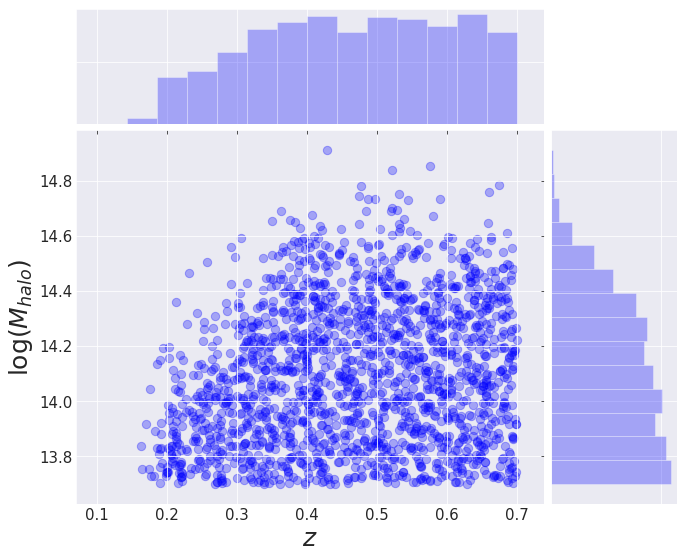

In [31]:
plot_scatter_hist(zcls,np.log10(m200),ylabel=r'$\log(M_{halo})$')

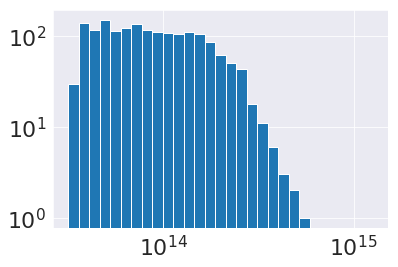

In [32]:
xbins = np.logspace(13.5,15.1,30)
_     = plt.hist(m200*h,bins=xbins)
plt.xscale('log')
plt.yscale('log')

In [33]:
#### Get Magnitude Model

In [34]:
z = cat_golden['redshift']
magLim3 = getMagLimModel(mag_file,z,dm=1)
cat_golden['magLim'] = magLim3[:,1]                ##i-band

Text(0.5,0,'redshift')

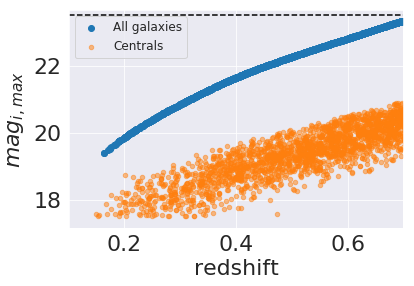

In [42]:
plt.scatter(z,magLim3[:,1],label='All galaxies')
plt.scatter(cat['redshift'][::100],cat['MAG_I'][::100],s=20,alpha=0.5,label='Centrals')

plt.axhline(23.5,color='k',ls='--')
plt.xlim(0.1,0.7)

plt.legend(fontsize=12)
plt.ylabel(r'$mag_{i,max}$')
plt.xlabel('redshift')

### Make Healpix Map

### Save Output